In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [2]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [3]:
len(df_Abstract_uspto)

595466

In [4]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
len(df_Abstract_uspto)

60000

# preprocessing

In [5]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [6]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [7]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [8]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [9]:
#Divide the dataset into different size
df_Abstract_20K=df_Abstract_uspto[:20000]
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
73184,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...,"[signaling, may, transmitter, capable, sending..."
73185,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...,"[signal, lower, frequency, converted, higher, ..."
73186,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...,"[improved, digital, capacitive, isolation, bar..."
73187,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...,"[using, four, transmit, antenna, channel, codi..."


In [10]:
df_Abstract_30K=df_Abstract_uspto[:30000]
df_Abstract_30K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
109561,US07086456,combination of fan and heat sink,a combination of fan and heat sink includes a ...,['H05K'],a combination of fan and heat sink includes a ...,combination fan heat sink fan heat sink four f...,combination fan heat sink fan heat sink four f...,"[combination, fan, heat, sink, fan, heat, sink..."
109614,US07086512,headset cable retraction system,a headset cable retraction system and device i...,['H02G'],a headset cable retraction system and device i...,headset cable retraction housing housing cavit...,headset cable retraction housing housing cavit...,"[headset, cable, retraction, housing, housing,..."
109636,US07086453,integrated liquid cooling system for electrica...,a liquid cooling system includes a cooling bod...,"['H05K', 'F28F']",a liquid cooling system includes a cooling bod...,liquid cooling cooling body liquid circulation...,liquid cooling cooling body liquid circulation...,"[liquid, cooling, cooling, body, liquid, circu..."
109716,US07086603,data collection system having a data collector,a system for collecting data in a room the sys...,"['H05K', 'G05D']",a system for collecting data in a room the sys...,collecting room sensor devices positioned loca...,collecting room sensor device positioned locat...,"[collecting, room, sensor, device, positioned,..."


In [11]:
df_Abstract_50K=df_Abstract_uspto[:50000]
df_Abstract_50K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
180755,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,['H04M'],a distributed telephone answering system has i...,distributed telephone answering intelligence d...,distributed telephone answering intelligence d...,"[distributed, telephone, answering, intelligen..."
180756,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,['H01L'],a fuse bank of a semiconductor memory device i...,fuse bank semiconductor memory provided fuse b...,fuse bank semiconductor memory provided fuse b...,"[fuse, bank, semiconductor, memory, provided, ..."
180758,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,['H03G'],the invention relates to power amplifiers havi...,relates power amplifiers adjustable output imp...,relates power amplifier adjustable output impe...,"[relates, power, amplifier, adjustable, output..."
180761,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,"['H01L', 'G06K']",an ic card capable of reinforcing the preventi...,ic card capable reinforcing prevention electro...,ic card capable reinforcing prevention electro...,"[ic, card, capable, reinforcing, prevention, e..."


# identify the number of topic for LDA-Abstract

In [12]:
#num-topic=50 for 20k

In [13]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 50  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.45930446453899443
c_npmi coherence: -0.08179772555927782
u_mass coherence: -6.834826748206593


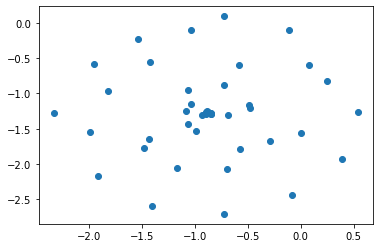

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assuming you have already trained your LDA model and obtained the topic-word distribution
# and the document-topic distribution

# get the topic-word distribution
topic_word_dist = lda_model.get_topics()

# get the document-topic distribution
doc_topic_dist = lda_model.get_document_topics(corpus)

# use t-SNE to reduce the dimensionality of the topic-word distribution to 2
tsne_model = TSNE(n_components=2, random_state=0)
topic_word_tsne = tsne_model.fit_transform(topic_word_dist)

# plot the t-SNE visualization of the topic clusters
plt.scatter(topic_word_tsne[:, 0], topic_word_tsne[:, 1])
plt.show()

In [ ]:
#num-topic=60 for 20k

In [16]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 60  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4634055941874869
c_npmi coherence: -0.07806451136970982
u_mass coherence: -6.967650406062563


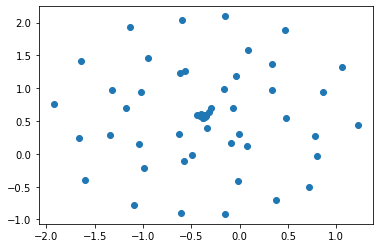

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assuming you have already trained your LDA model and obtained the topic-word distribution
# and the document-topic distribution

# get the topic-word distribution
topic_word_dist = lda_model.get_topics()

# get the document-topic distribution
doc_topic_dist = lda_model.get_document_topics(corpus)

# use t-SNE to reduce the dimensionality of the topic-word distribution to 2
tsne_model = TSNE(n_components=2, random_state=0)
topic_word_tsne = tsne_model.fit_transform(topic_word_dist)

# plot the t-SNE visualization of the topic clusters
plt.scatter(topic_word_tsne[:, 0], topic_word_tsne[:, 1])
plt.show()

In [18]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=5)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: device interface one may operating
Topic #1: generator primary fixed movable secondary
Topic #2: value object reference difference table
Topic #3: transmission received error radio based
Topic #4: number rate parameter switching pulse
Topic #5: electrode film formed semiconductor capacitor
Topic #6: pressure waveguide polymer glass linear
Topic #7: connector pair cover cavity section
Topic #8: mode rf band pre single
Topic #9: switch winding bus host turn
Topic #10: code bit sequence stream symbol
Topic #11: group fuel_cell composite water density
Topic #12: packet call processing medium card
Topic #13: housing electrical hole wall circuit_board
Topic #14: region formed gate forming trench
Topic #15: unit memory control picture type
Topic #16: core tube lamp driver virtual
Topic #17: length sub distance emitter transmission_line
Topic #18: set temperature beam detection test
Topic #19: substrate structure surface formed metal
Topic #20: signal digital output gain control
Topi

In [19]:
#num-topic=70 for 20k

In [21]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 70  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4486448788418444
c_npmi coherence: -0.11482001148598989
u_mass coherence: -7.8711607037798075


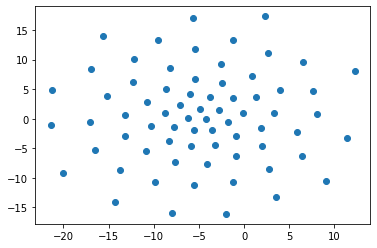

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assuming you have already trained your LDA model and obtained the topic-word distribution
# and the document-topic distribution

# get the topic-word distribution
topic_word_dist = lda_model.get_topics()

# get the document-topic distribution
doc_topic_dist = lda_model.get_document_topics(corpus)

# use t-SNE to reduce the dimensionality of the topic-word distribution to 2
tsne_model = TSNE(n_components=2, random_state=0)
topic_word_tsne = tsne_model.fit_transform(topic_word_dist)

# plot the t-SNE visualization of the topic clusters
plt.scatter(topic_word_tsne[:, 0], topic_word_tsne[:, 1])
plt.show()

# num-topic=50-100 for 20k lDA

In [36]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.45930446453899443
Number of Topics:  60  Coherence Score:  0.4634055941874869
Number of Topics:  70  Coherence Score:  0.4486448788418444
Number of Topics:  80  Coherence Score:  0.43703944550372437
Number of Topics:  90  Coherence Score:  0.4452747451241258
Number of Topics:  100  Coherence Score:  0.4314701328893139


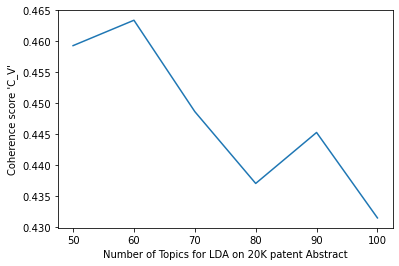

In [37]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 20K patent Abstract")
plt.ylabel("Coherence score 'C_V'")
plt.show()

# num-topic=50-100 for 30k LDA

In [38]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_30K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.4680821021596758
Number of Topics:  60  Coherence Score:  0.4569870721963318
Number of Topics:  70  Coherence Score:  0.43692492369740776
Number of Topics:  80  Coherence Score:  0.4298872926211038
Number of Topics:  90  Coherence Score:  0.4378028110457347
Number of Topics:  100  Coherence Score:  0.4319934548302934


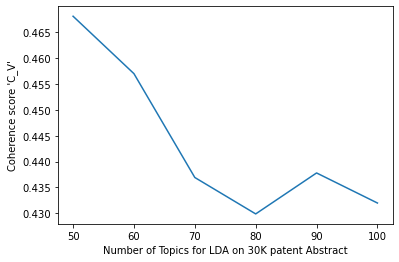

In [39]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 30K patent Abstract")
plt.ylabel("Coherence score 'C_V'")
plt.show()

# num-topic=50-100 for 50k LDA

In [41]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_50K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.47285323195109663
Number of Topics:  60  Coherence Score:  0.44082966229570186
Number of Topics:  70  Coherence Score:  0.44240778084055327
Number of Topics:  80  Coherence Score:  0.43481719050510537
Number of Topics:  90  Coherence Score:  0.4205976200271406
Number of Topics:  100  Coherence Score:  0.40849167793955327


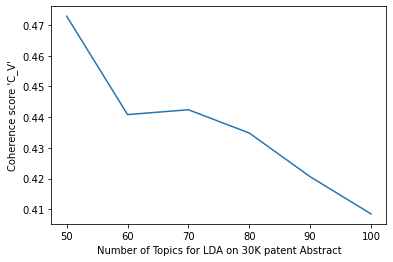

In [42]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 30K patent Abstract")
plt.ylabel("Coherence score 'C_V'")
plt.show()

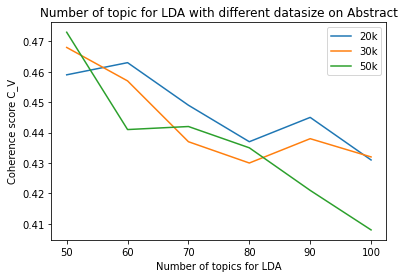

In [45]:
import matplotlib.pyplot as plt

# coherence scores for each dataset
k_20k = [(50, 0.459), (60, 0.463), (70, 0.449), (80, 0.437), (90, 0.445), (100, 0.431)]
k_30k = [(50, 0.468), (60, 0.457), (70, 0.437), (80, 0.430), (90, 0.438), (100, 0.432)]
k_50k = [(50, 0.473), (60, 0.441), (70, 0.442), (80, 0.435), (90, 0.421), (100, 0.408)]

# separate the x and y values for each dataset
x_20k, y_20k = zip(*k_20k)
x_30k, y_30k = zip(*k_30k)
x_50k, y_50k = zip(*k_50k)

# create the plot
plt.plot(x_20k, y_20k, label='20k')
plt.plot(x_30k, y_30k, label='30k')
plt.plot(x_50k, y_50k, label='50k')
plt.xlabel('Number of topics for LDA')
plt.ylabel('Coherence score C_V')
plt.title('Number of topic for LDA with different datasize on Abstract')
plt.legend()
plt.show()


# NMF

# num-topic=50-100 for 20k NMF

In [46]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)


Number of Topics:  50  Coherence Score:  0.4272774413472316
Number of Topics:  60  Coherence Score:  0.4264076790584721
Number of Topics:  70  Coherence Score:  0.4265757054672824
Number of Topics:  80  Coherence Score:  0.415470287774035
Number of Topics:  90  Coherence Score:  0.4164471018347196
Number of Topics:  100  Coherence Score:  0.414600623102301


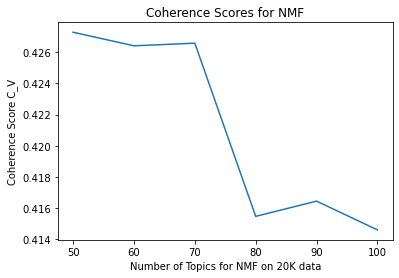

In [47]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 20K data")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF")
plt.show()

# num-topic=50-100 for 30k NMF

In [48]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_30K['Lemmatized-Abstract']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.48321718255580515
Number of Topics:  60  Coherence Score:  0.48609736553365473
Number of Topics:  70  Coherence Score:  0.44780097435796207
Number of Topics:  80  Coherence Score:  0.4423922420118204
Number of Topics:  90  Coherence Score:  0.4390016186960263
Number of Topics:  100  Coherence Score:  0.43443800037741376


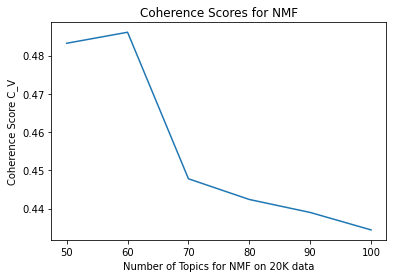

In [49]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 20K data")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF")
plt.show()

# num-topic=50-100 for 50k NMF

In [50]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_50K['Lemmatized-Abstract']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.5086765377913532
Number of Topics:  60  Coherence Score:  0.5029364269566959
Number of Topics:  70  Coherence Score:  0.4925576887545472
Number of Topics:  80  Coherence Score:  0.4877899625331752
Number of Topics:  90  Coherence Score:  0.46972199011864463
Number of Topics:  100  Coherence Score:  0.4883743445590331


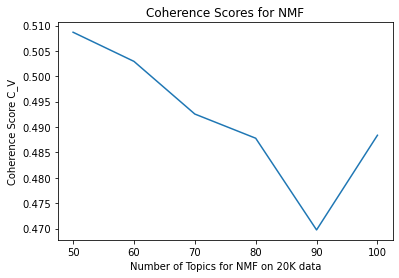

In [51]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 20K data")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF")
plt.show()

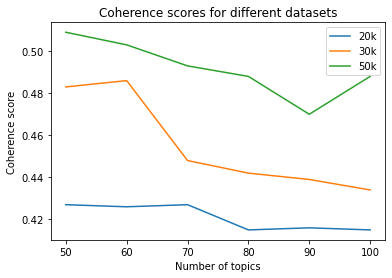

In [52]:
import matplotlib.pyplot as plt

# coherence scores for each dataset
k_20k = [(50, 0.427), (60, 0.426), (70, 0.427), (80, 0.415), (90, 0.416), (100, 0.415)]
k_30k = [(50, 0.483), (60, 0.486), (70, 0.448), (80, 0.442), (90, 0.439), (100, 0.434)]
k_50k = [(50, 0.509), (60, 0.503), (70, 0.493), (80, 0.488), (90, 0.470), (100, 0.488)]

# separate the x and y values for each dataset
x_20k, y_20k = zip(*k_20k)
x_30k, y_30k = zip(*k_30k)
x_50k, y_50k = zip(*k_50k)

# create the plot
plt.plot(x_20k, y_20k, label='20k')
plt.plot(x_30k, y_30k, label='30k')
plt.plot(x_50k, y_50k, label='50k')
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('Coherence scores for different datasets')
plt.legend()
plt.show()